In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing the Loan Prediction Dataset:

In [ ]:
atrain=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/train_agriculture.csv')
atest=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/test_agriculture.csv')

Identification of data types:

In [ ]:
atrain.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [ ]:
atest.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

Size of the dataset:

In [ ]:
print('Size of Test Dataset:', atest.shape)
print('Size of Train Dataset:', atrain.shape)

Size of Test Dataset: (1199, 9)
Size of Train Dataset: (88858, 10)


Statistical Summary of Numeric Variables:

In [ ]:
atest.describe

<bound method NDFrame.describe of              ID  Estimated_Insects_Count  ...  Number_Weeks_Quit  Season
0     F00000002                      188  ...                  0       2
1     F00000007                      410  ...                  0       2
2     F00000011                      626  ...                  0       2
3     F00000013                      731  ...                  0       2
4     F00000014                      789  ...                  0       1
...         ...                      ...  ...                ...     ...
1194  F00003133                     1132  ...                  7       3
1195  F00003135                     1132  ...                  3       1
1196  F00003138                     1132  ...                 23       1
1197  F00003149                     1212  ...                  5       1
1198  F00003150                     1212  ...                 20       3

[1199 rows x 9 columns]>

In [ ]:
atrain.describe

<bound method NDFrame.describe of               ID  Estimated_Insects_Count  ...  Season  Crop_Damage
0      F00000001                      188  ...       1            0
1      F00000003                      209  ...       2            1
2      F00000004                      257  ...       2            1
3      F00000005                      257  ...       2            1
4      F00000006                      342  ...       2            1
...          ...                      ...  ...     ...          ...
88853  F00155935                     3337  ...       3            0
88854  F00155938                     3516  ...       1            0
88855  F00155939                     3516  ...       2            0
88856  F00155942                     3702  ...       3            0
88857  F00155945                     3895  ...       3            0

[88858 rows x 10 columns]>

Non-Graphical Univariate Analysis:

In [ ]:
print('Info Test Dataset', atest.info())
print('Info Train Dataset', atrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB
Info Test Dataset None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----

In [ ]:
#Finding null values in Test Dataset

print(atest.isnull().sum(axis = 0))

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64


In [ ]:
#Finding null values in Train Dataset

print(atrain.isnull().sum(axis = 0))

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64


In [ ]:
#Remove Null Values

atest.Number_Weeks_Used.fillna(value=14.454200,inplace=True)
atrain.Number_Weeks_Used.fillna(value=14.454200,inplace=True)

In [ ]:
#Check again if null values are handled
print(atest.isnull().sum(axis = 0))

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64


In [ ]:
print(atrain.isnull().sum(axis = 0))

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64


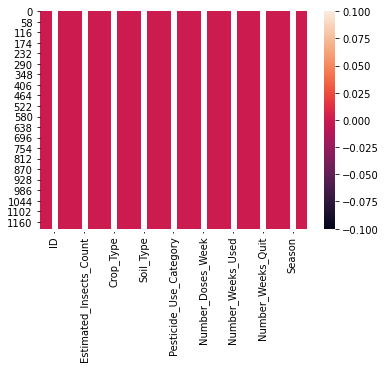

In [ ]:
#checking the distribution of values using Heatmap for test dataset

sns.heatmap(atest.isnull(), annot= True)
plt.show()

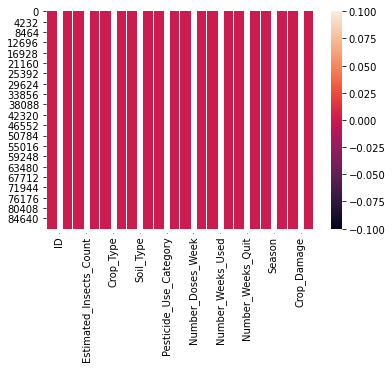

In [ ]:
#checking the distribution of values using Heatmap for train dataset

sns.heatmap(atrain.isnull(), annot= True)
plt.show()

Graphical Univariate Analysis:

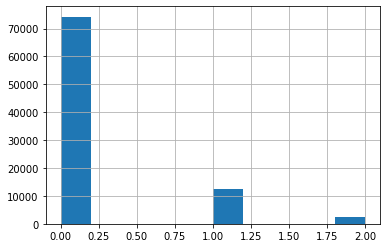

In [ ]:
#Histogram

atrain['Crop_Damage'].hist(bins=10)

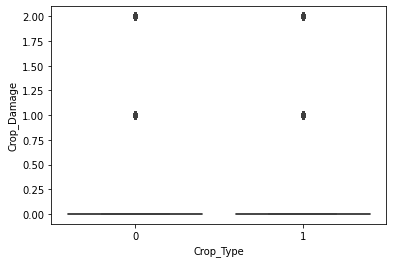

In [ ]:
#Boxplot

#Plot between the age and survied column

sns.boxplot(x=atrain['Crop_Type'],y=atrain['Crop_Damage'])

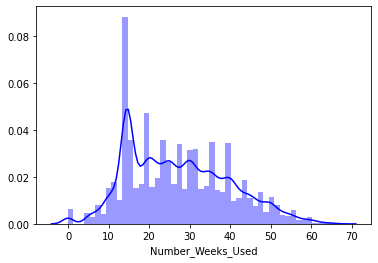

In [ ]:
#DistPlot

sns.distplot(atrain[pd.notnull(atrain.Number_Weeks_Used)]['Number_Weeks_Used'],color='blue')

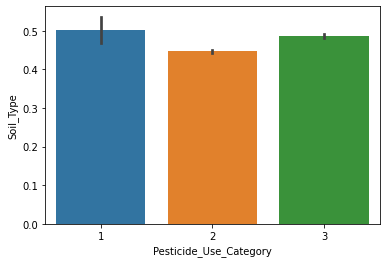

In [ ]:
#BarPlot

sns.barplot(x=atrain['Pesticide_Use_Category'],y=atrain['Soil_Type'])

In [ ]:
#Checking the skewness
print('Skewness Train:', atrain.skew())
print('Skewness Test:', atest.skew())

Skewness Train: Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.412530
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64
Skewness Test: Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.378409
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64


In [ ]:
#checking for correaltion between variables

atrain[['Crop_Type','Soil_Type']].corr()

,Crop_Type,Soil_Type
Crop_Type,1.000000,-0.287372
Soil_Type,-0.287372,1.000000


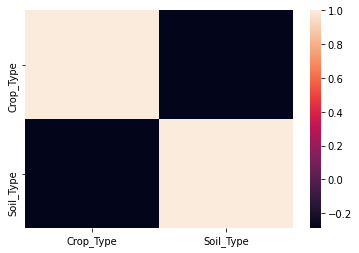

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(atrain[['Crop_Type','Soil_Type']].corr())

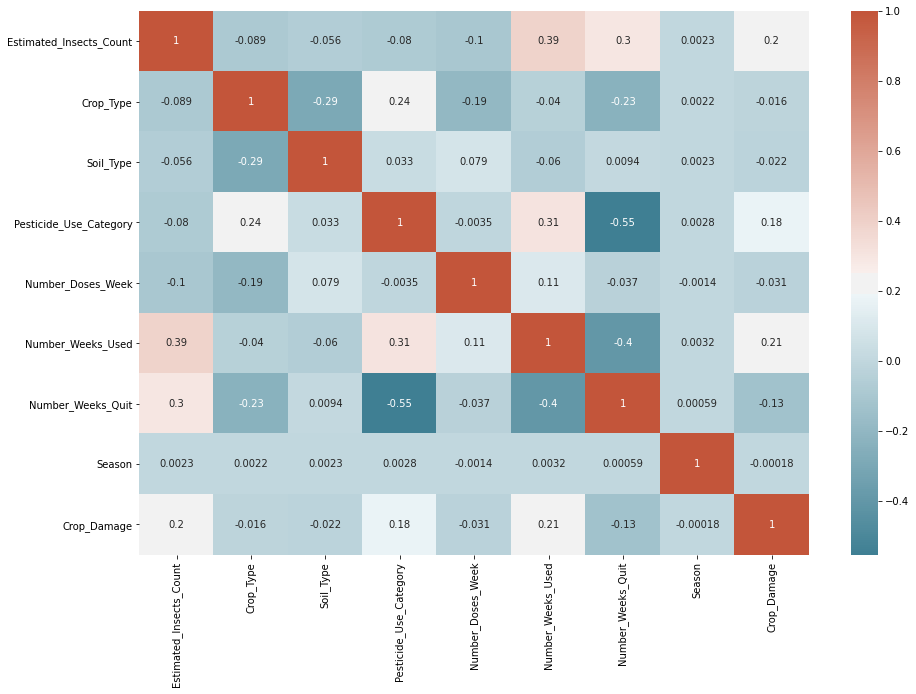

In [ ]:
corr = atrain.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
atrain['Season'] = le.fit_transform(atrain['Season'])
atrain['Crop_Damage '] = le.fit_transform(atrain['Crop_Damage'])
atrain.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,0,0,0
1,F00000003,209,1,0,1,0,0.0,0,1,1,1
2,F00000004,257,1,0,1,0,0.0,0,1,1,1
3,F00000005,257,1,1,1,0,0.0,0,1,1,1
4,F00000006,342,1,0,1,0,0.0,0,1,1,1


In [ ]:
atrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 7.5+ MB


In [ ]:
#Drop ID Column
atrain.drop('ID',axis=1,inplace=True)

In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = atrain['Crop_Damage']
X = atrain

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
atrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 6.8 MB


In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18586
           1       1.00      1.00      1.00      3071
           2       1.00      1.00      1.00       558

    accuracy                           1.00     22215
   macro avg       1.00      1.00      1.00     22215
weighted avg       1.00      1.00      1.00     22215



In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18586
           1       1.00      1.00      1.00      3071
           2       1.00      1.00      1.00       558

    accuracy                           1.00     22215
   macro avg       1.00      1.00      1.00     22215
weighted avg       1.00      1.00      1.00     22215



In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 1.000000 (0.000000)
Decision Tree with Gini Coefficient: 1.000000 (0.000000)
K Nearest Neighbors: 0.877850 (0.000030)
Naive Bayes: 1.000000 (0.000000)
Random Forrest: 1.000000 (0.000000)
Random Forrest with Gini Coefficient: 1.000000 (0.000000)
Bagging Classifier: 1.000000 (0.000000)
Ada Boost Classifier: 1.000000 (0.000000)
Gradient Boosting Classifier: 1.000000 (0.000000)
XGB Classifier: 1.000000 (0.000000)
XGBRF Classifier: 1.000000 (0.000000)


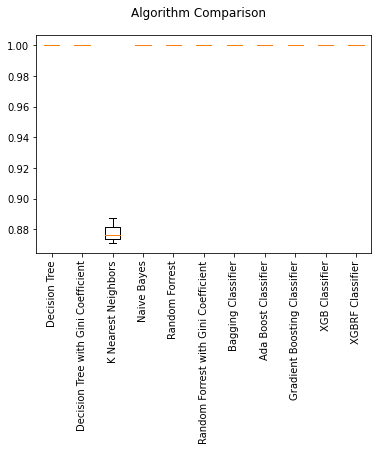

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()